In [1]:
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


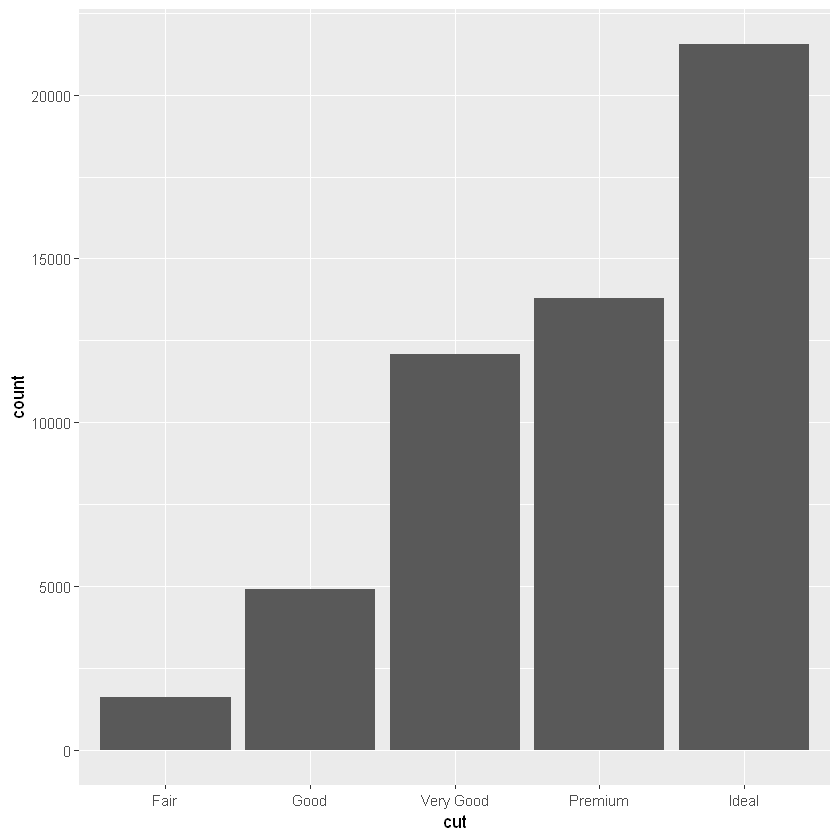

In [2]:
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut))

In [3]:
diamonds %>% 
  count(cut)

cut,n
Fair,1610
Good,4906
Very Good,12082
Premium,13791
Ideal,21551


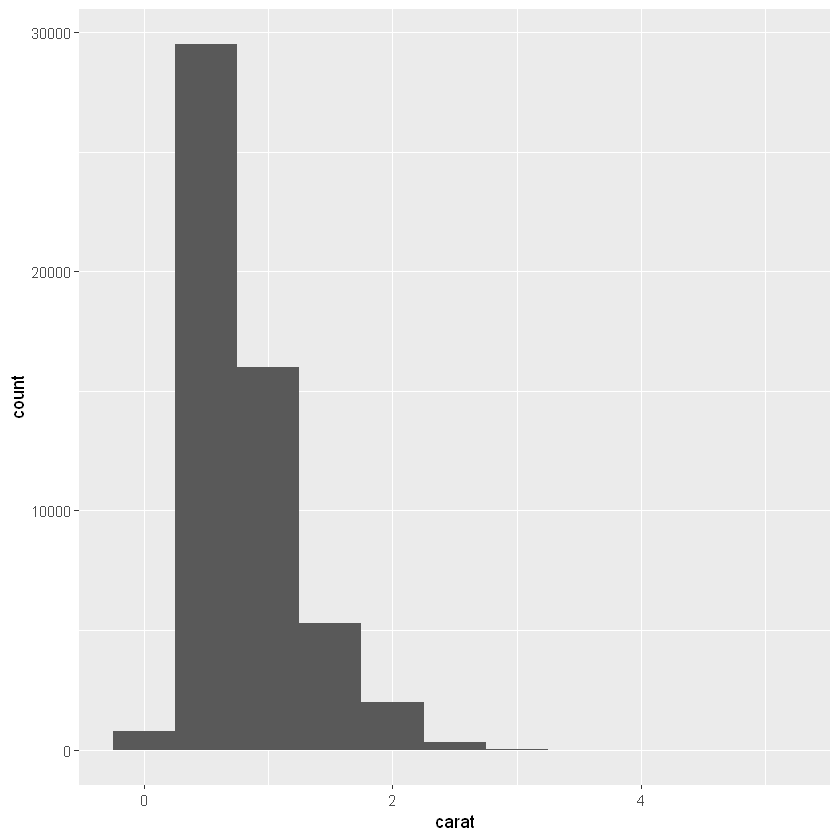

In [4]:
ggplot(data = diamonds) +
  geom_histogram(mapping = aes(x = carat), binwidth = 0.5)

In [5]:
diamonds %>% 
  count(cut_width(carat, 0.5))

"cut_width(carat, 0.5)",n
"[-0.25,0.25]",785
"(0.25,0.75]",29498
"(0.75,1.25]",15977
"(1.25,1.75]",5313
"(1.75,2.25]",2002
"(2.25,2.75]",322
"(2.75,3.25]",32
"(3.25,3.75]",5
"(3.75,4.25]",4
"(4.25,4.75]",1


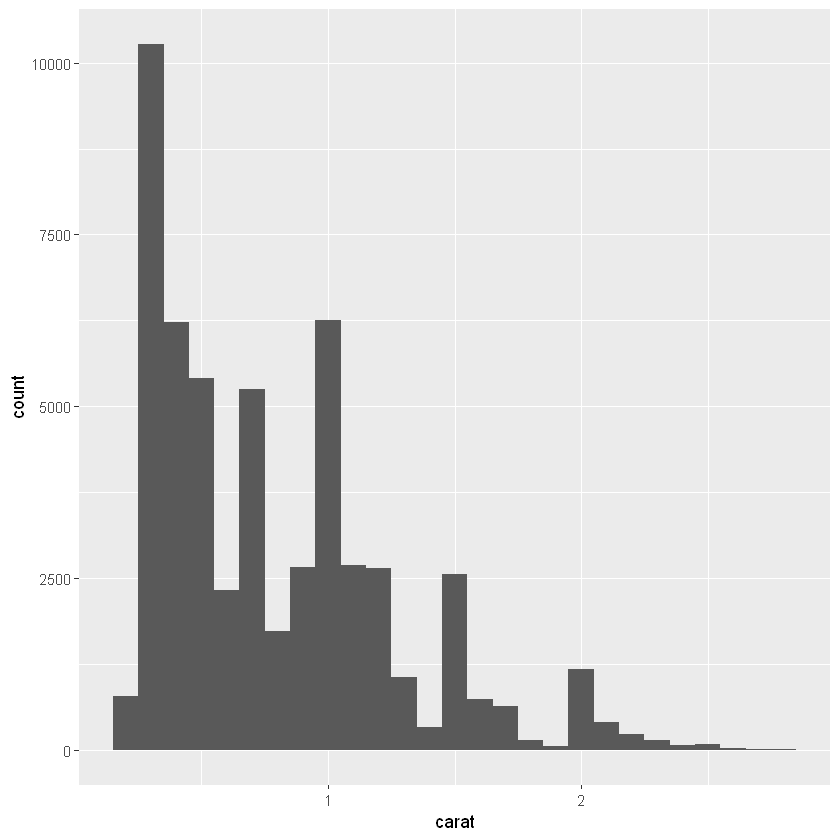

In [11]:
smaller <- diamonds %>% 
  filter(carat < 3)
  
ggplot(data = smaller, mapping = aes(x = carat)) +
  geom_histogram(binwidth = 0.1)

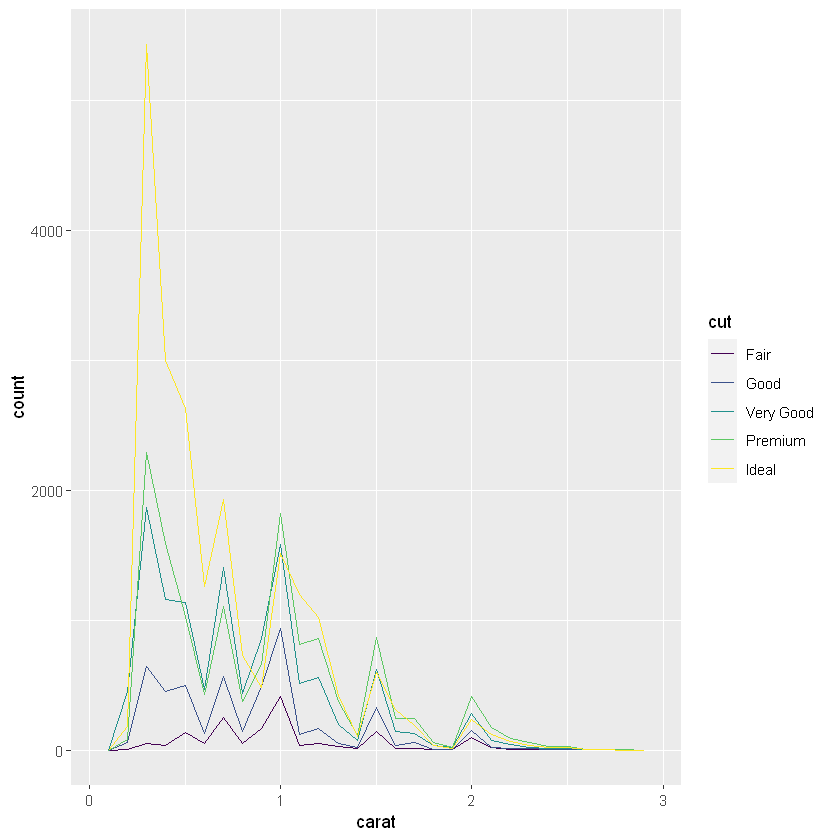

In [15]:
ggplot(data = smaller, mapping = aes(x = carat, colour = cut)) +
  geom_freqpoly(binwidth = 0.1)

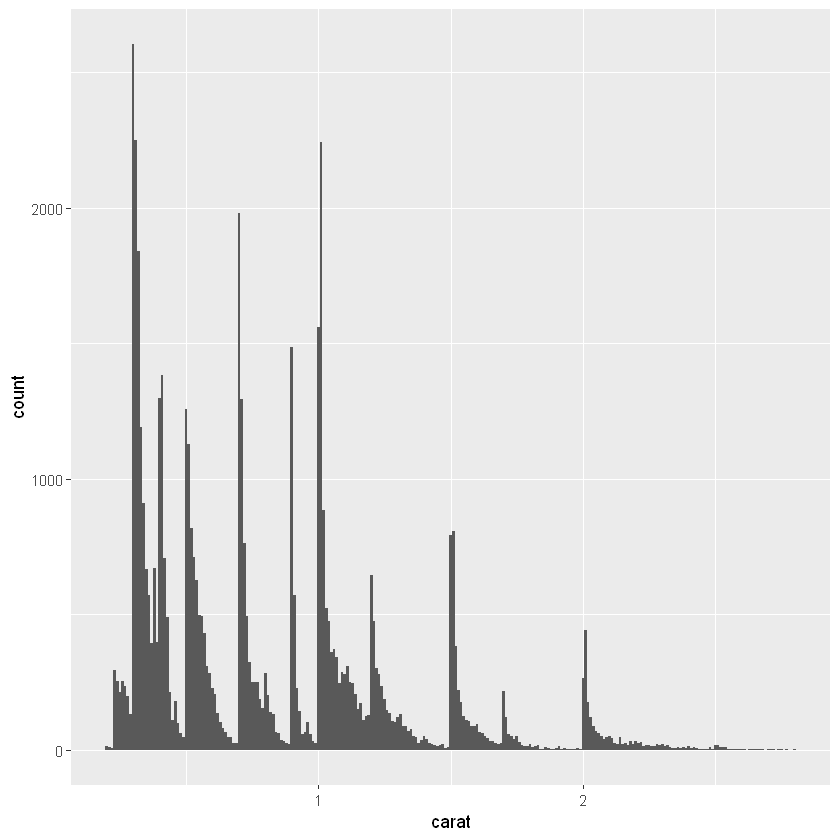

In [16]:
ggplot(data = smaller, mapping = aes(x = carat)) +
  geom_histogram(binwidth = 0.01)

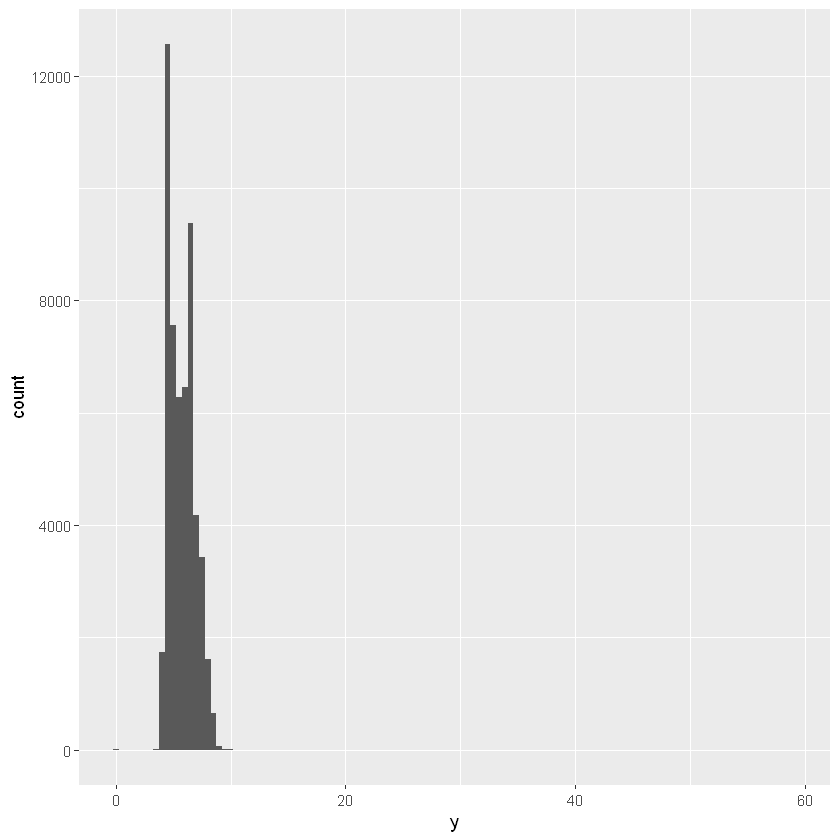

In [17]:
ggplot(diamonds) + 
  geom_histogram(mapping = aes(x = y), binwidth = 0.5)

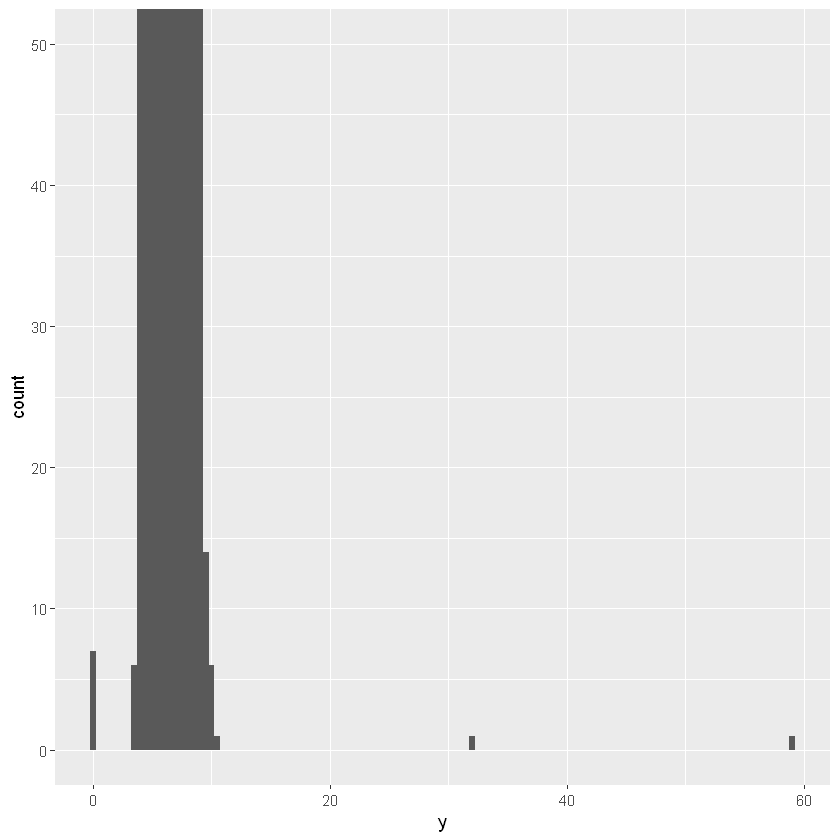

In [18]:
ggplot(diamonds) + 
  geom_histogram(mapping = aes(x = y), binwidth = 0.5) +
  coord_cartesian(ylim = c(0, 50))

In [21]:
unusual <- diamonds %>% 
  filter(y < 3 | y > 20) %>% 
  select(price, x, y, z) %>%
  arrange(y)
unusual

price,x,y,z
5139,0.00,0.0,0.00
6381,0.00,0.0,0.00
12800,0.00,0.0,0.00
15686,0.00,0.0,0.00
18034,0.00,0.0,0.00
2130,0.00,0.0,0.00
2130,0.00,0.0,0.00
2075,5.15,31.8,5.12
12210,8.09,58.9,8.06


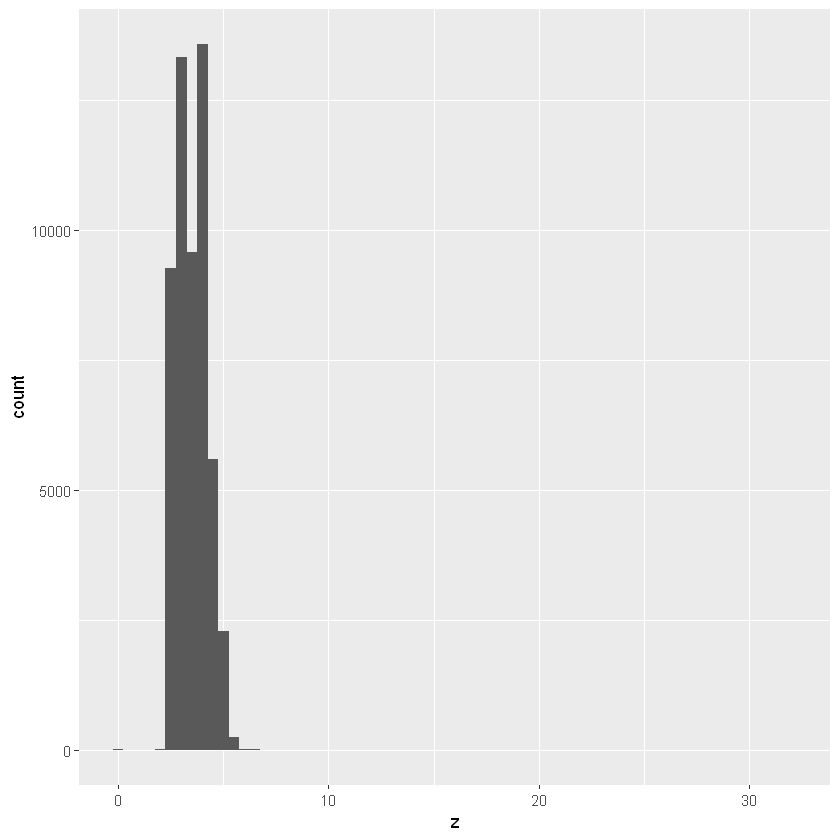

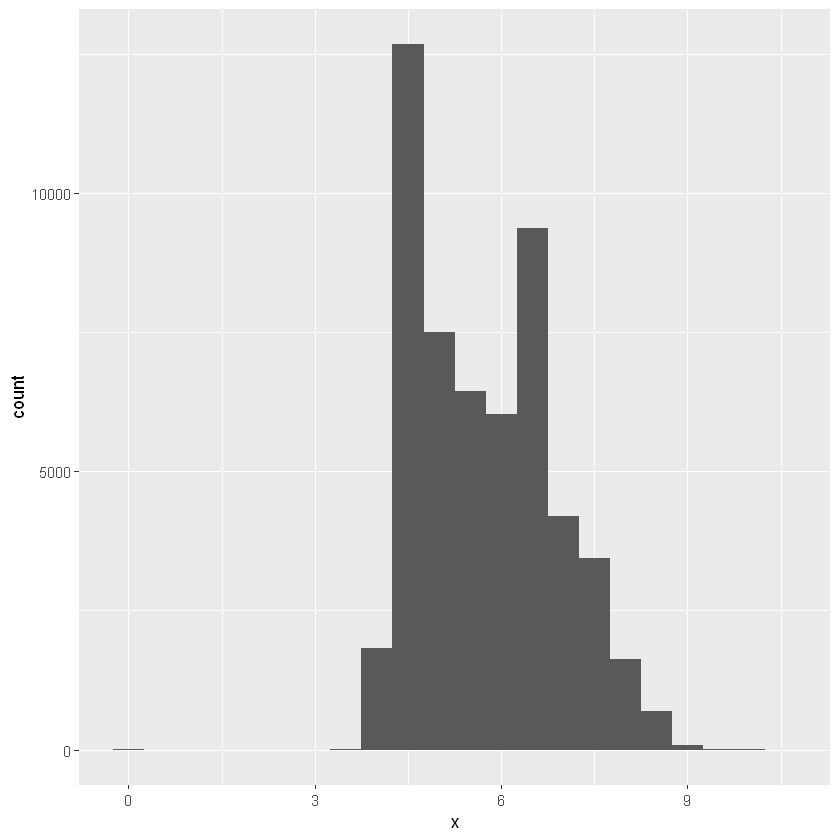

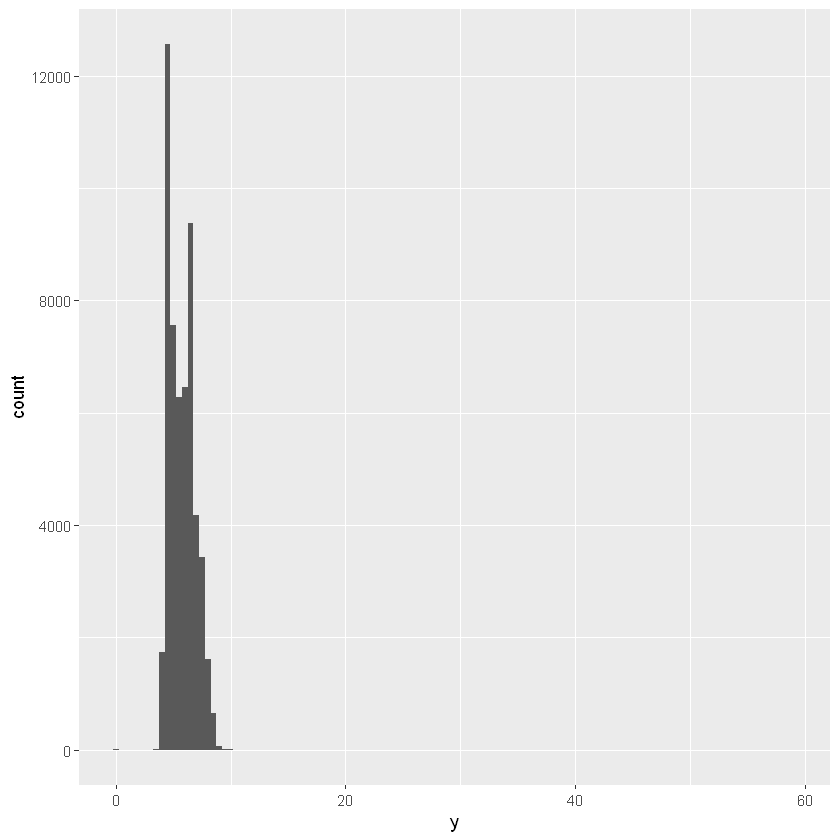

In [28]:
ggplot(diamonds) + 
    geom_histogram(mapping = aes(z), binwidth = 0.5)
ggplot(diamonds) + 
    geom_histogram(mapping = aes(x), binwidth = 0.5)
ggplot(diamonds) + 
    geom_histogram(mapping = aes(y), binwidth = 0.5)

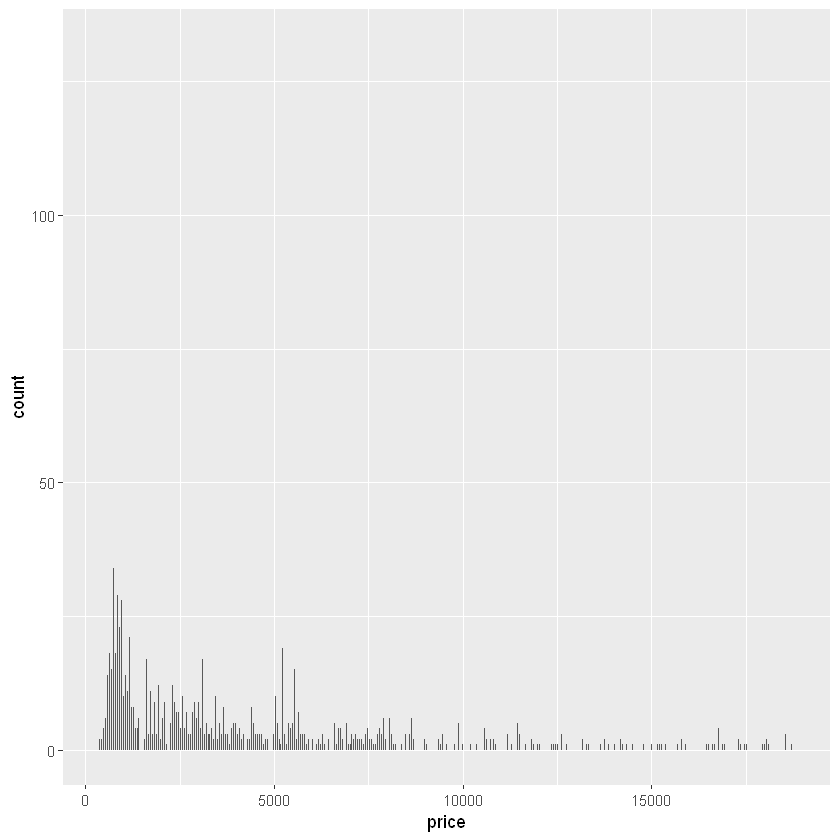

In [29]:
ggplot(diamonds) + 
    geom_histogram(mapping = aes(price), binwidth = 0.5)

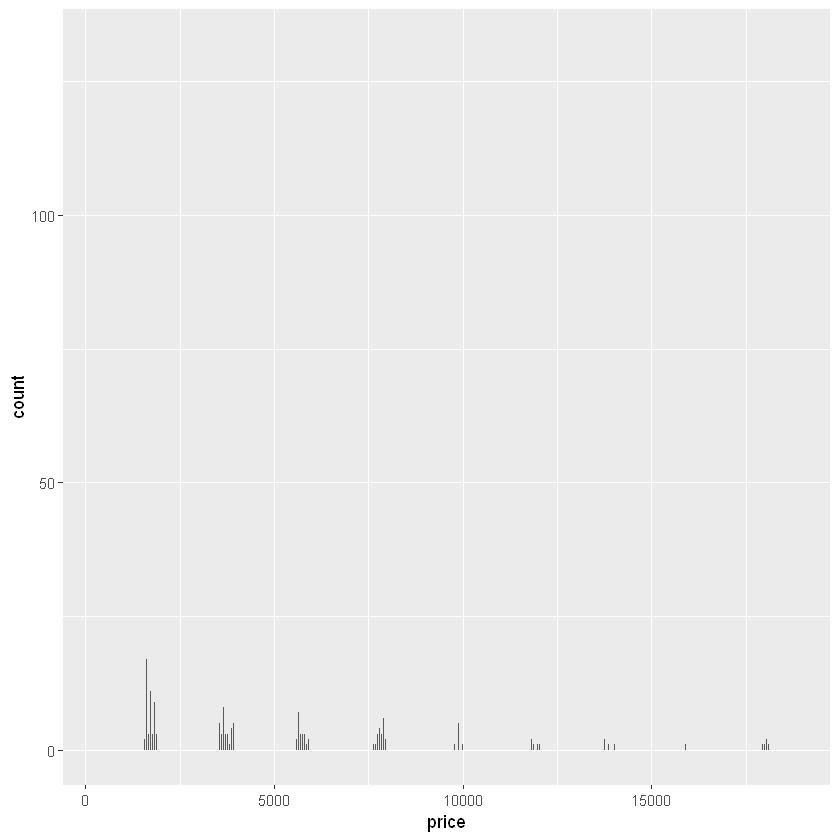

In [30]:
ggplot(diamonds) + 
    geom_histogram(mapping = aes(price), binwidth = 0.1)

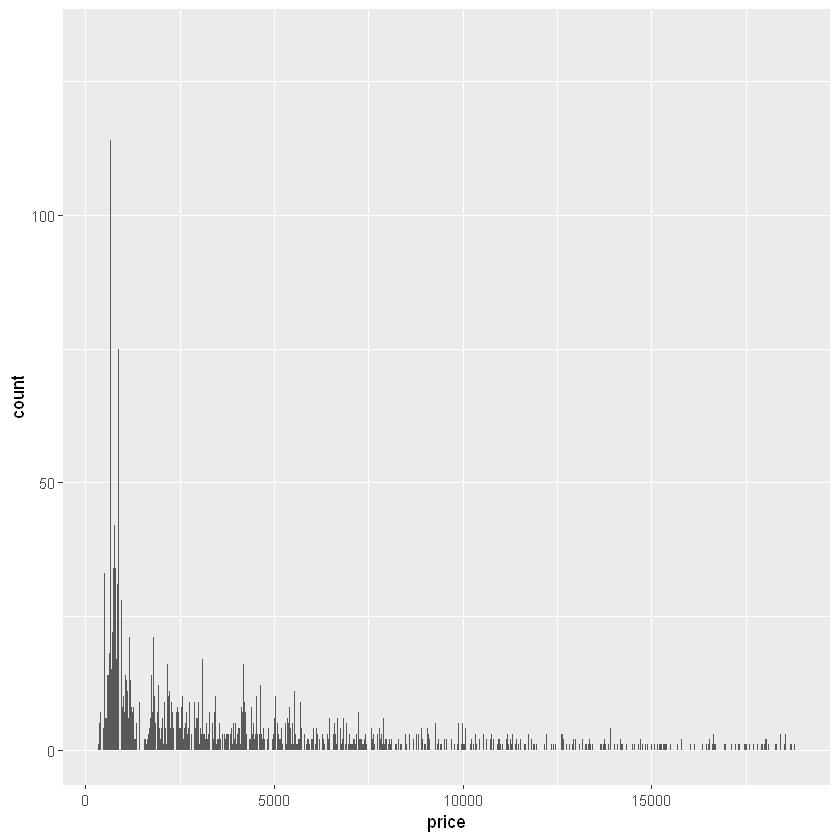

In [31]:
ggplot(diamonds) + 
    geom_histogram(mapping = aes(price), binwidth = 0.9)

In [34]:
x <- diamonds %>% 
  filter(carat == 1)

In [35]:
count(x)

n
1558


In [38]:
y <- diamonds %>% 
  filter(carat == 0.99)

In [39]:
count(y)

n
23


In [40]:
diamonds2 <- diamonds %>% 
  filter(between(y, 3, 20))

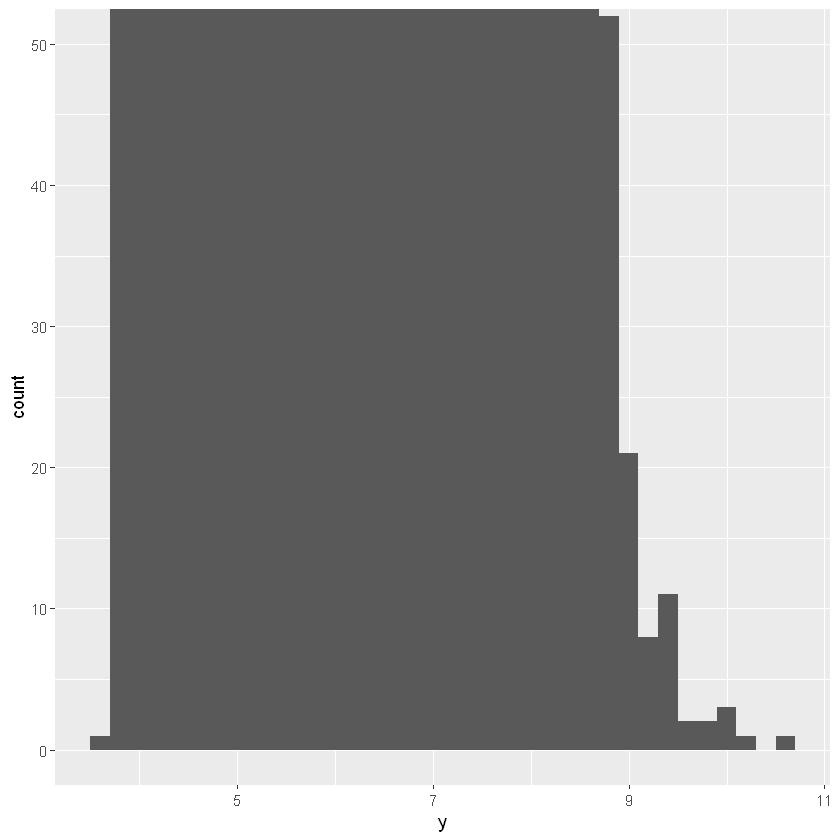

In [44]:
ggplot(diamonds2) + 
  geom_histogram(mapping = aes(x = y), binwidth = 0.2) +
  coord_cartesian(ylim = c(0, 50))

In [45]:
diamonds2 <- diamonds %>% 
  mutate(y = ifelse(y < 3 | y > 20, NA, y))

In [49]:
diamonds3 <- diamonds %>% 
  mutate(y = ifelse(y > 3 | y < 20, NA, y))

Warning message:
"Removed 9 rows containing non-finite values (stat_bin)."

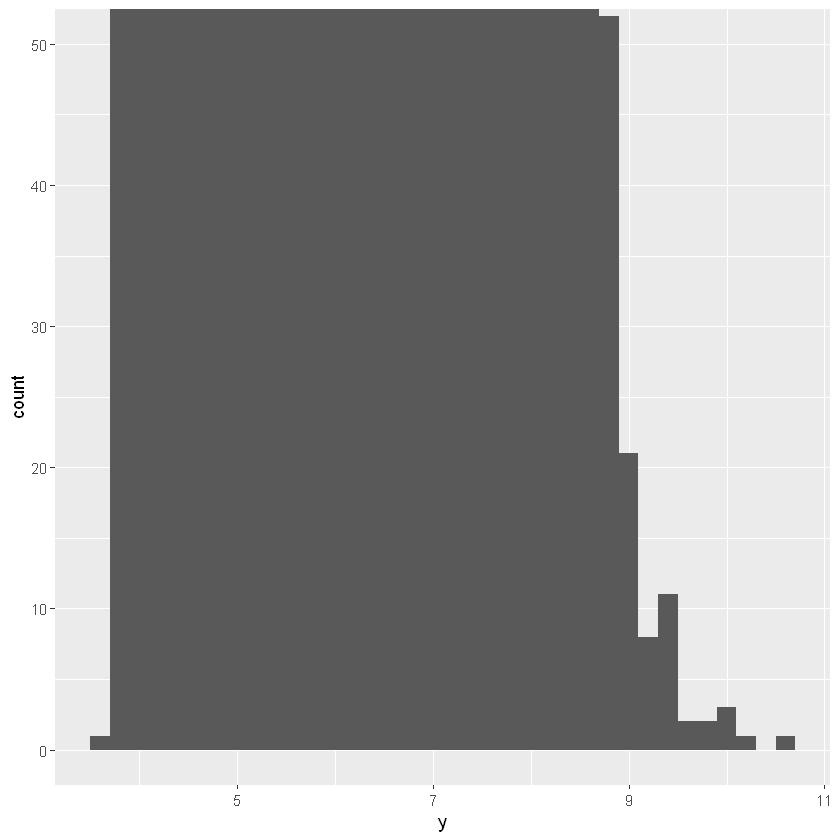

In [46]:
ggplot(diamonds2) + 
  geom_histogram(mapping = aes(x = y), binwidth = 0.2) +
  coord_cartesian(ylim = c(0, 50))

Warning message:
"Removed 9 rows containing missing values (geom_point)."

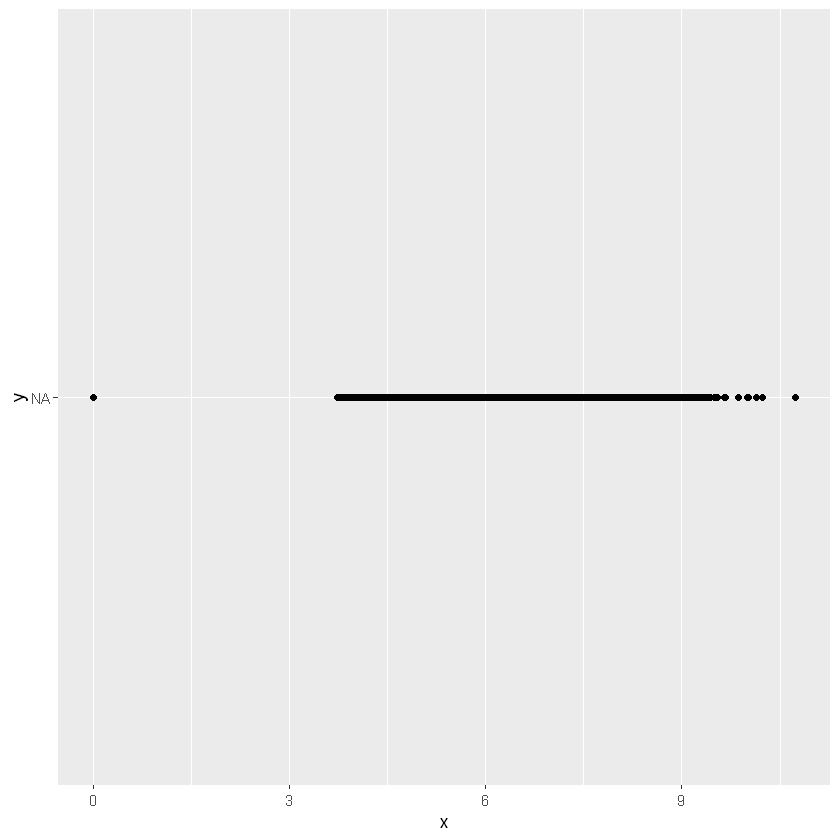

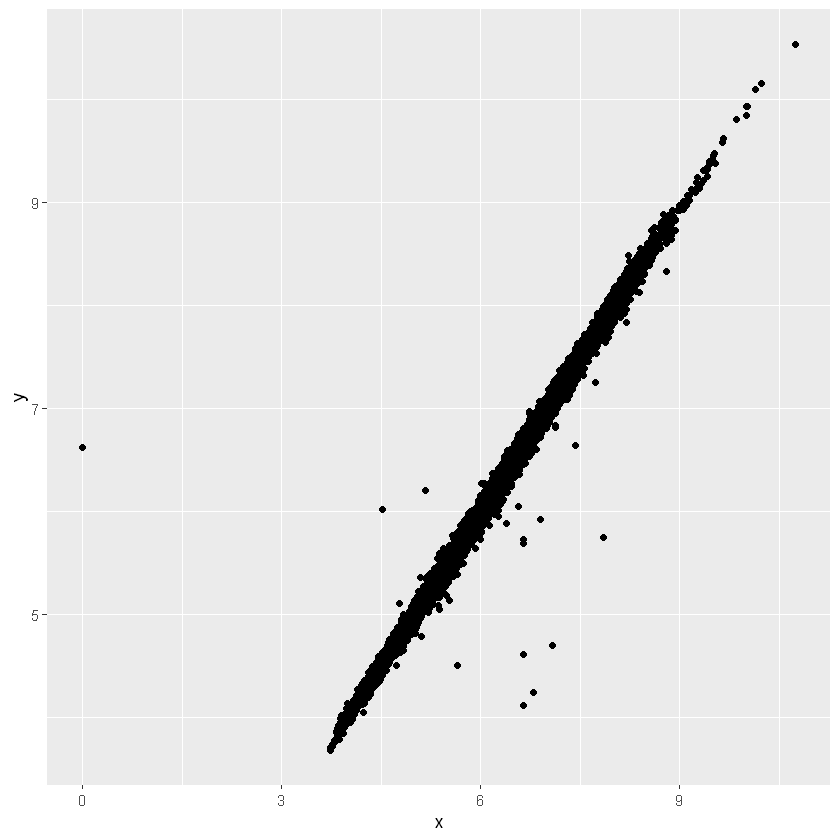

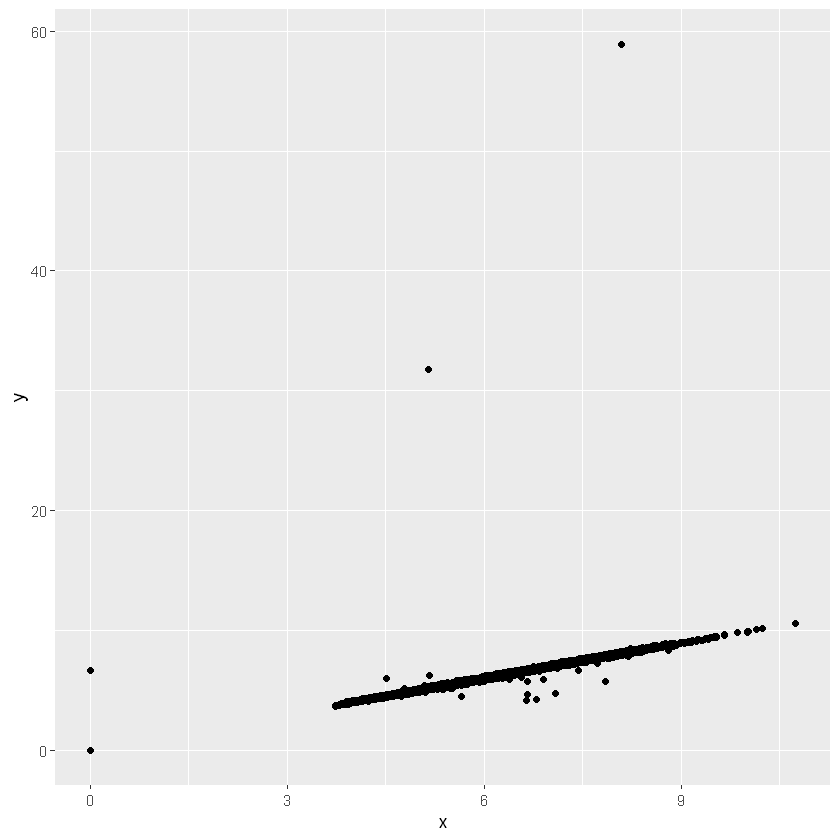

In [51]:
ggplot(data = diamonds3, mapping = aes(x = x, y = y)) + 
  geom_point()
ggplot(data = diamonds2, mapping = aes(x = x, y = y)) + 
  geom_point()
ggplot(data = diamonds, mapping = aes(x = x, y = y)) + 
  geom_point()

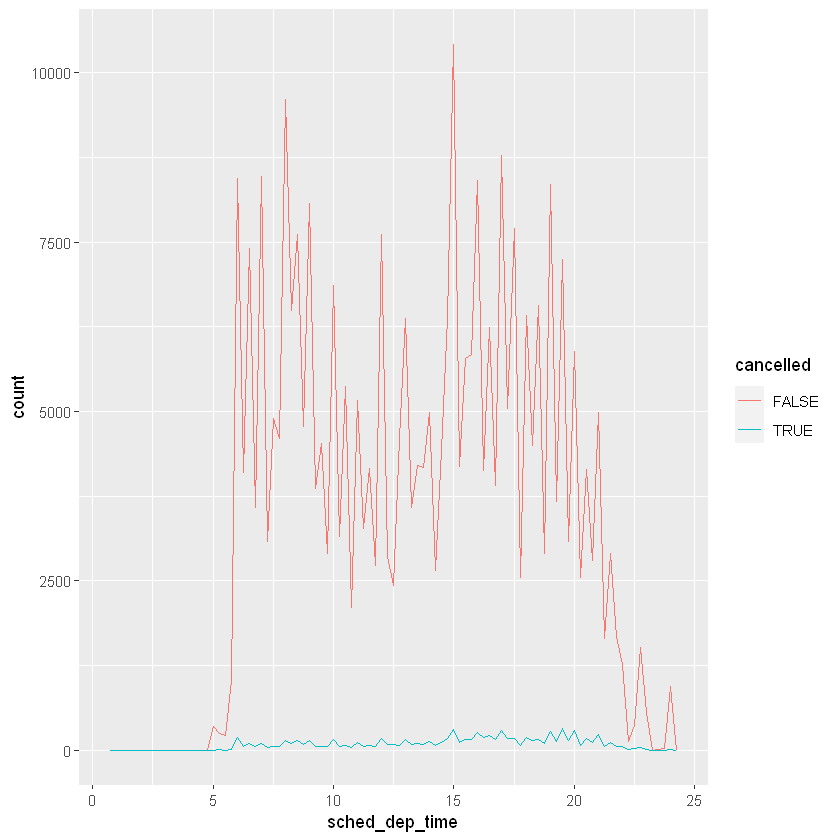

In [52]:
nycflights13::flights %>% 
  mutate(
    cancelled = is.na(dep_time),
    sched_hour = sched_dep_time %/% 100,
    sched_min = sched_dep_time %% 100,
    sched_dep_time = sched_hour + sched_min / 60
  ) %>% 
  ggplot(mapping = aes(sched_dep_time)) + 
    geom_freqpoly(mapping = aes(colour = cancelled), binwidth = 1/4)

Warning message:
"Removed 9 rows containing non-finite values (stat_bin)."

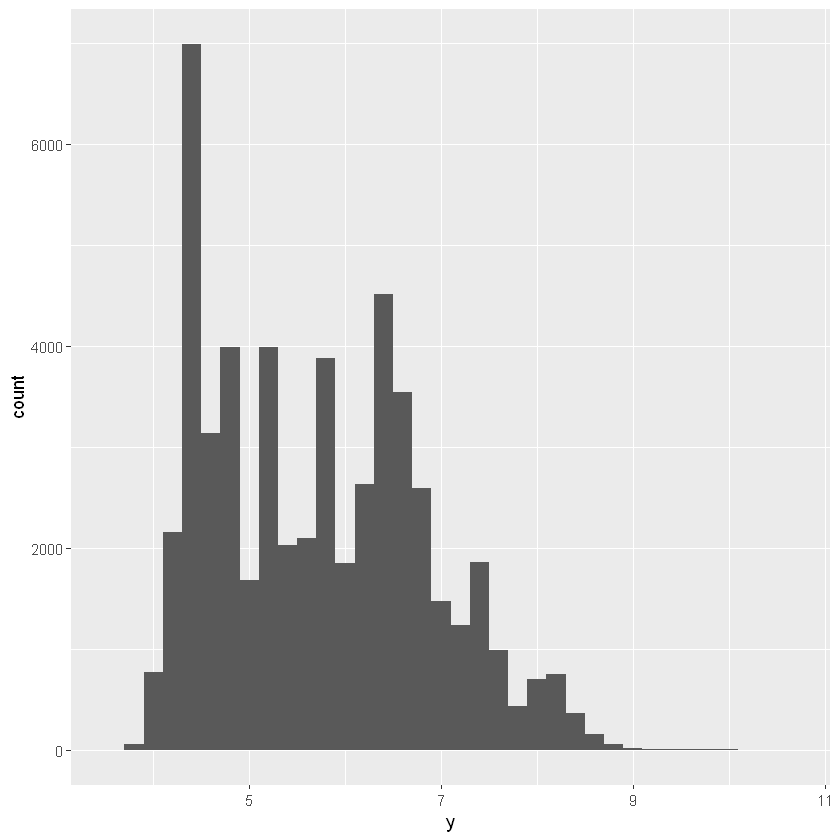

In [54]:
ggplot(diamonds2) + 
  geom_histogram(mapping = aes(x = y), binwidth = 0.2)

Warning message:
"Ignoring unknown parameters: binwidth"Warning message:
"Removed 9 rows containing non-finite values (stat_count)."

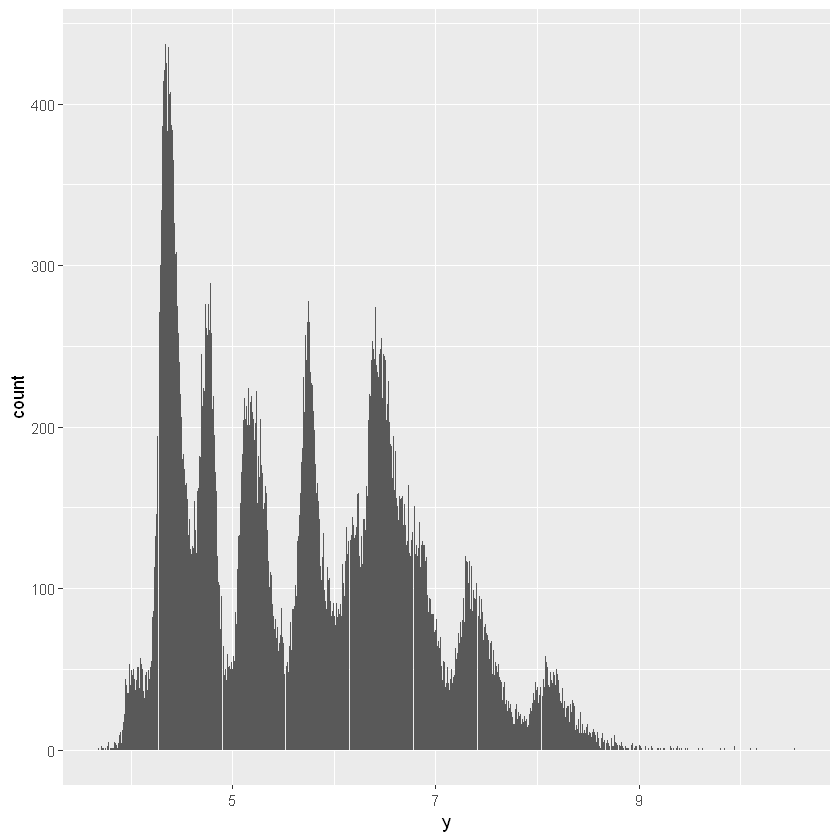

In [55]:
ggplot(diamonds2) + 
  geom_bar(mapping = aes(x = y), binwidth = 0.2)

In [57]:
mean(diamonds2, na.rm = TRUE)

Warning message in mean.default(diamonds2, na.rm = TRUE):
"argument is not numeric or logical: returning NA"

[1] NA